In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy
import re

In [44]:

df = pd.read_csv("wasp_17b_parameters.csv", header=None)
df = df.drop(columns=df.columns[0])
print(df)


                    1                              2                      3   \
0  Stassun et al. 2017          Patel & Espinoza 2022    Ivshina & Winn 2022   
1                    0                            ---                    ---   
2         86.63+/-0.42                            ---                    ---   
3  3.735430+/-0.000008  3.7354300+0.0000071-0.0000074  3.7354826+/-0.0000015   
4          1.87+/-0.24                            ---                    ---   
5                  ---                            ---                    ---   
6                  ---              0.180+0.130-0.100                    ---   
7                  ---           0.1218+0.0016-0.0014                    ---   
8                  ---                            ---                    ---   

                      4                    5                      6   \
0     Bonomo et al. 2017  Barstow et al. 2017  Sedaghati et al. 2016   
1                  0.020                  ---          

In [45]:
df_ref_list = df.loc[0]
df_e_list = df.loc[1] #Eccentricty row
e_mask = np.where(df_e_list=="---", False, True) #Masking values

In [46]:
for e, maskm, ref in zip(df_e_list, e_mask, df_ref_list):
    print(e, maskm, ref)

0 True Stassun et al. 2017
--- False Patel & Espinoza 2022
--- False Ivshina & Winn 2022
0.020 True Bonomo et al. 2017
--- False Barstow et al. 2017
0 True Sedaghati et al. 2016
--- False Sing et al. 2016
0.039+0.050-0.027 True Knutson et al. 2014
0 True Southworth et al. 2012
0.028+0.015-0.018 True Anderson et al. 2011
0.11 True Triaud et al. 2010
0.129+0.106-0.068 True Anderson et al. 2010
--- False Alderson et al. 2022


In [47]:
e = "0.028+0.015-0.018"
e = re.split('\+|\-', e)
e = [float(e[0]), float(e[1]), float('-' + e[2])]
print(e)


[0.028, 0.015, -0.018]


In [48]:
e = "0.028+/-0.015"
if "+/-" in e:
    e_tmp = re.split('\+\/\-', e)
    e = [float(e_tmp[0]), float(e_tmp[1]), float('-' + e_tmp[1])]
    print(e)
    

[0.028, 0.015, -0.015]


In [49]:
e_list = []
ref_list = []
#Turning a "0.028+/-0.015" into [0.028, 0.015,-0.015]
#or "0.028+0.015-0.015" into [0.028, 0.015,-0.015]
for param, pmask, ref in zip(df_e_list, e_mask, df_ref_list):
    if pmask == True:
        if "+/-" in e:
            param = re.split('\+|\-', param)
            param = [float(param[0]), float(param[1]), float('-' + param[2])]

            print(param)
        elif ("+" in param) and ("-" in param):
            if param[0] == "-": #If param value is negative
                param = e[1:]
                param_tmp = re.split('\+|\-', param)
                param = [float(param_tmp[0]), float(param_tmp[1]), float('-' + param_tmp[1])]
            else: #param value is 
                param_tmp = re.split('\+|\-', param)
                param = [float(param_tmp[0]), float(param_tmp[1]), float('-' + param_tmp[1])]
        else:
            param = [float(param), 0.0, 0.0]
        e_list.append(param)
        ref_list.append(ref)

e_list = np.array(e_list)
print(e_list)
print(ref_list)

[[ 0.     0.     0.   ]
 [ 0.02   0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.039  0.05  -0.05 ]
 [ 0.     0.     0.   ]
 [ 0.028  0.015 -0.015]
 [ 0.11   0.     0.   ]
 [ 0.129  0.106 -0.106]]
['Stassun et al. 2017', 'Bonomo et al. 2017', 'Sedaghati et al. 2016', 'Knutson et al. 2014', 'Southworth et al. 2012', 'Anderson et al. 2011', 'Triaud et al. 2010', 'Anderson et al. 2010']


C:\Users\Student\AppData\Local\Temp\ipykernel_20948\3520665279.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ref_list)


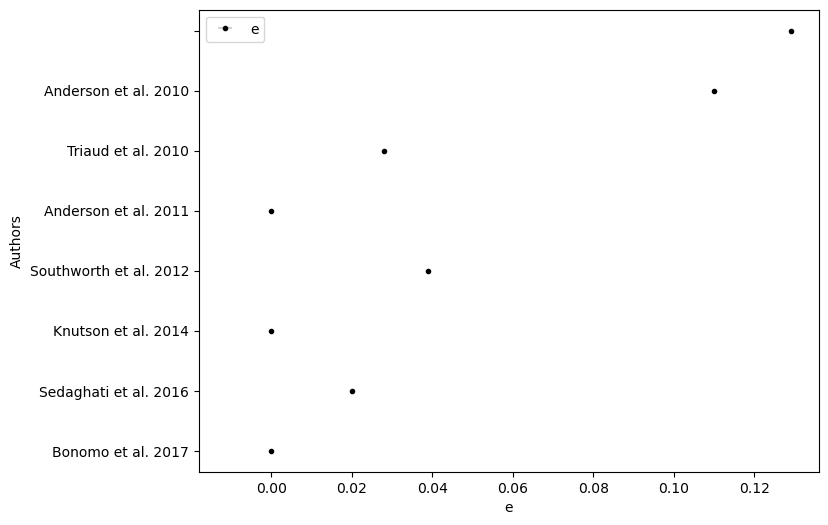

In [56]:
y = range(0, len(ref_list))

fig, ax = plt.subplots(1, figsize=(8,6))

asymmetric_error = [e_list[:,1], e_list[:,2]]
plt.errorbar(e_list[:,0], y, xerr=asymmetric_error, fmt=".", color="black", ecolor="LightGrey", label="e")
ax.legend()

plt.xlabel("e")
plt.ylabel("Authors")
ax.set_yticklabels(ref_list)

plt.show()
